In [1]:
pip install numpy scikit-learn seaborn matplotlib

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.


Analisi di correlazione tra le features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carica il dataset
print("Caricamento del dataset...")
df = pd.read_csv('atp_tennis.csv')

# Filtra le quote negative o nulle
df = df[(df['Odd_1'] > 0) & (df['Odd_2'] > 0)]

# Crea la variabile target (1 se vince Player_1, 0 se vince Player_2)
df['Target'] = (df['Winner'] == df['Player_1']).astype(int)

# Codifica le variabili categoriche
le = LabelEncoder()
categorical_features = ['Surface', 'Court', 'Series', 'Round']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Feature numeriche e categoriche codificate per l'analisi
features_for_correlation = [
    'Rank_1', 'Rank_2',
    'Pts_1', 'Pts_2',
    'Odd_1', 'Odd_2',
    'Surface', 'Court',
    'Series', 'Round',
    'Target'
]

# Calcola la differenza di ranking e punti
df['Rank_Diff'] = df['Rank_1'] - df['Rank_2']
df['Pts_Diff'] = df['Pts_1'] - df['Pts_2']
df['Odds_Diff'] = df['Odd_1'] - df['Odd_2']

# Aggiungi le nuove feature calcolate
features_for_correlation.extend(['Rank_Diff', 'Pts_Diff', 'Odds_Diff'])

# Seleziona le feature per la correlazione
df_corr = df[features_for_correlation]

# Calcola la matrice di correlazione
correlation_matrix = df_corr.corr(method='pearson')

# Visualizza la matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            vmin=-1, vmax=1,      
            center=0,             
            fmt='.2f')            

plt.title('Matrice di Correlazione (Pearson)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Stampa le correlazioni con il target ordinate per valore assoluto
print("\nCorrelazioni con il Target (vittoria del Player_1):")
target_correlations = correlation_matrix['Target'].drop('Target')
target_correlations_abs = target_correlations.abs().sort_values(ascending=False)

print("\nCorrelazioni ordinate per importanza (valore assoluto):")
for feature in target_correlations_abs.index:
    correlation = target_correlations[feature]
    print(f"{feature:15} : {correlation:6.3f}")

# Analisi delle correlazioni tra feature
print("\nCoppie di feature altamente correlate (|corr| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5 and i != j:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            corr = correlation_matrix.iloc[i, j]
            print(f"{feature1:15} - {feature2:15} : {corr:6.3f}")

Caricamento del dataset...


FileNotFoundError: [Errno 2] No such file or directory: 'atp_tennis.csv'

Classificare il vincitore (Winner) tra Player_1 e Player_2.

Classificare il livello del torneo (Series).

Caricamento del dataset...

Verifica dei valori mancanti:
Surface    0
Court      0
Round      0
Rank_1     0
Rank_2     0
Pts_1      0
Pts_2      0
Series     0
dtype: int64

Categorie per Surface: ['Clay' 'Grass' 'Hard']

Categorie per Court: ['Indoor' 'Outdoor']

Categorie per Round: ['1st Round' '2nd Round' '3rd Round' '4th Round' 'Quarterfinals'
 'Round Robin' 'Semifinals' 'The Final']

Categorie per Series: ['ATP250' 'ATP500' 'Grand Slam' 'International' 'International Gold'
 'Masters' 'Masters 1000' 'Masters Cup']

--------------------------------------------------
Valutazione del classificatore: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.70      3358
           1       0.34      0.17      0.23      1233
           2       0.41      0.37      0.39      2495
           3       0.60      0.71      0.65      2264
           4       0.22      0.14      0.17       679
           5       0.47   

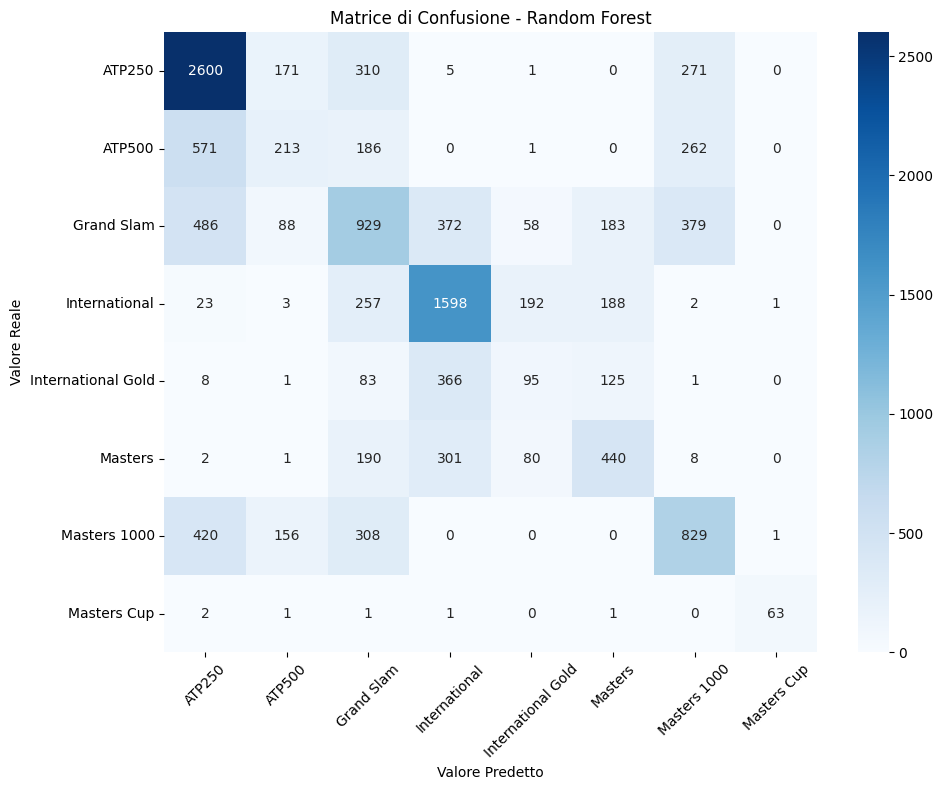

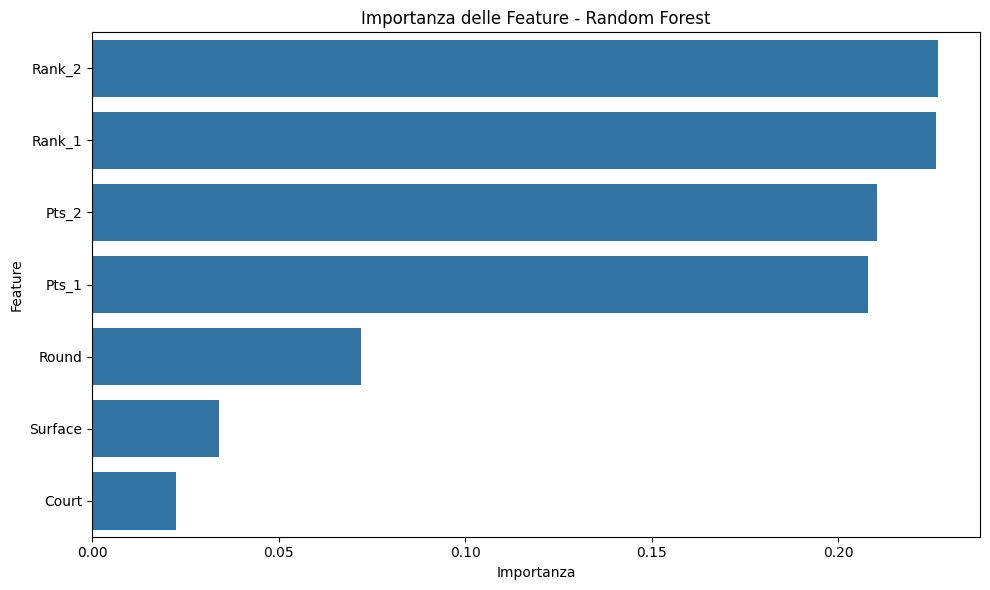


Importanza delle feature in percentuale:
Rank_2: 22.67%
Rank_1: 22.61%
Pts_2: 21.05%
Pts_1: 20.79%
Round: 7.21%
Surface: 3.41%
Court: 2.26%

--------------------------------------------------
Valutazione del classificatore: SVM


c:\Users\kikop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kikop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kikop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.91      0.55      3358
           1       0.00      0.00      0.00      1233
           2       0.36      0.09      0.14      2495
           3       0.45      0.62      0.53      2264
           4       0.00      0.00      0.00       679
           5       0.00      0.00      0.00      1022
           6       0.38      0.32      0.35      1714
           7       0.00      0.00      0.00        69

    accuracy                           0.41     12834
   macro avg       0.20      0.24      0.20     12834
weighted avg       0.31      0.41      0.31     12834



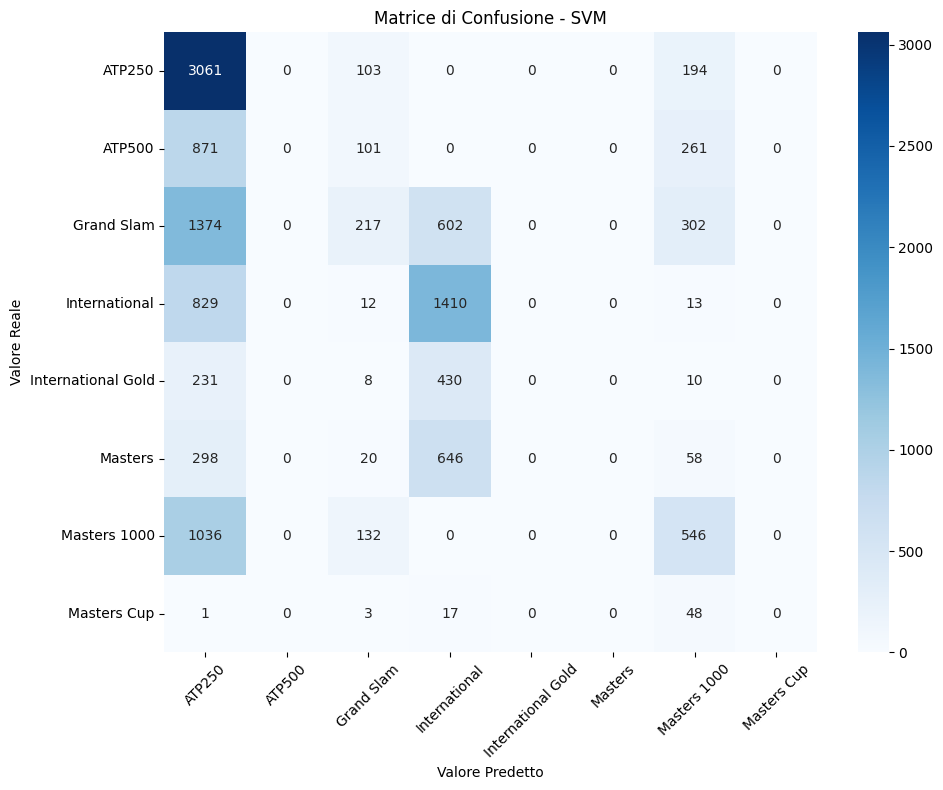


--------------------------------------------------
Valutazione del classificatore: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      3358
           1       0.52      0.11      0.18      1233
           2       0.47      0.34      0.39      2495
           3       0.59      0.81      0.68      2264
           4       0.35      0.02      0.04       679
           5       0.50      0.42      0.46      1022
           6       0.50      0.53      0.51      1714
           7       0.97      0.90      0.93        69

    accuracy                           0.55     12834
   macro avg       0.56      0.50      0.49     12834
weighted avg       0.53      0.55      0.51     12834



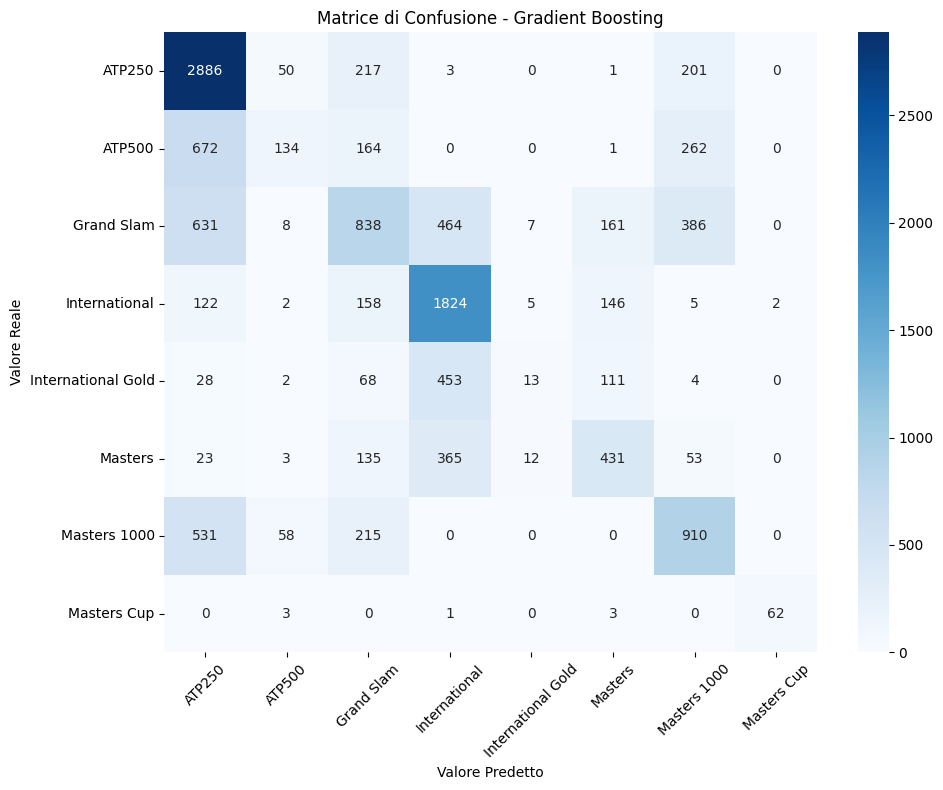

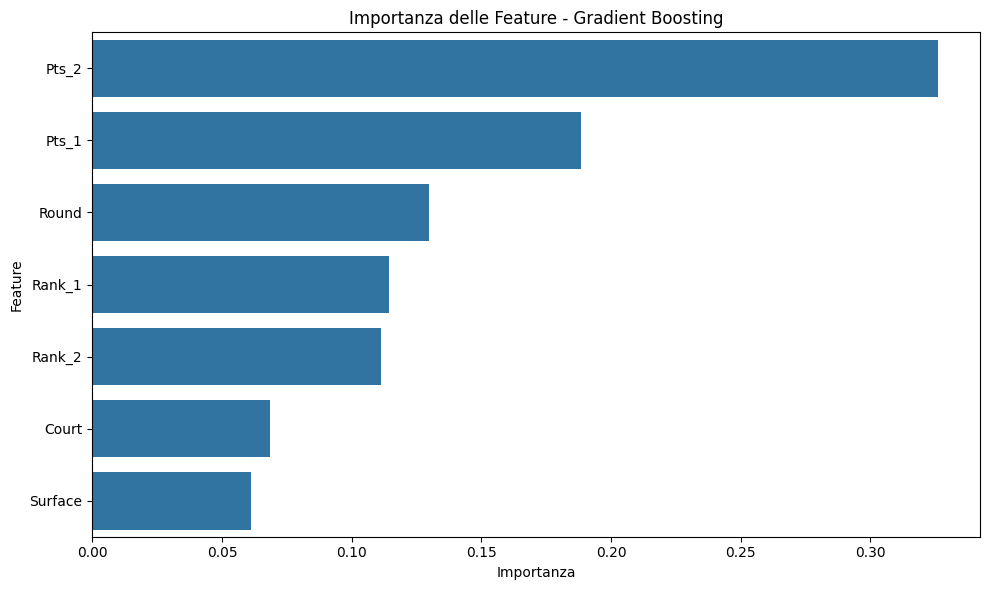


Importanza delle feature in percentuale:
Pts_2: 32.60%
Pts_1: 18.86%
Round: 12.97%
Rank_1: 11.46%
Rank_2: 11.11%
Court: 6.86%
Surface: 6.14%


c:\Users\kikop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kikop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kikop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 1200x600 with 0 Axes>

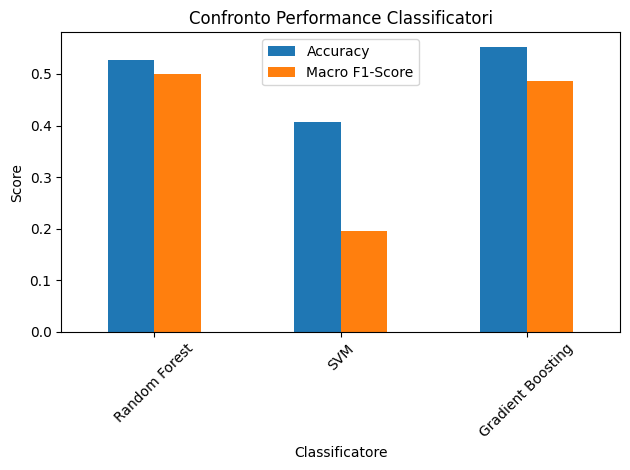


Tabella delle Performance:
   Classificatore  Accuracy  Macro F1-Score
    Random Forest  0.527271        0.500710
              SVM  0.407823        0.195791
Gradient Boosting  0.553062        0.486442


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati
print("Caricamento del dataset...")
df = pd.read_csv('atp_tennis.csv')

# Preparazione features
features = ['Surface', 'Court', 'Round', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']
target = 'Series'

# Verifica valori mancanti
print("\nVerifica dei valori mancanti:")
print(df[features + [target]].isnull().sum())

# Rimozione valori mancanti
df = df.dropna(subset=features + [target])

# Codifica variabili categoriche
le = LabelEncoder()
categorical_features = ['Surface', 'Court', 'Round']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    print(f"\nCategorie per {feature}: {le.classes_}")

# Codifica della variabile target
df['Series_encoded'] = le.fit_transform(df[target])
print(f"\nCategorie per Series: {le.classes_}")

# Preparazione dati
X = df[features]
y = df['Series_encoded']

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dizionario dei classificatori
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Valutazione dei modelli
results = {}

for name, clf in classifiers.items():
    print(f"\n{'-'*50}")
    print(f"Valutazione del classificatore: {name}")
    
    # Addestramento
    clf.fit(X_train, y_train)
    
    # Predizioni
    y_pred = clf.predict(X_test)
    
    # Salvataggio risultati
    results[name] = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Report di classificazione
    print("\nClassification Report:")
    print(results[name]['classification_report'])
    
    # Matrice di confusione
    plt.figure(figsize=(10, 8))
    cm = results[name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f'Matrice di Confusione - {name}')
    plt.ylabel('Valore Reale')
    plt.xlabel('Valore Predetto')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Feature importance per Random Forest e Gradient Boosting
    if name in ['Random Forest', 'Gradient Boosting']:
        feature_importance = pd.DataFrame({
            'feature': features,
            'importance': clf.feature_importances_
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance)
        plt.title(f'Importanza delle Feature - {name}')
        plt.xlabel('Importanza')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        
        print("\nImportanza delle feature in percentuale:")
        for idx, row in feature_importance.iterrows():
            print(f"{row['feature']}: {row['importance']*100:.2f}%")

# Confronto delle performance
performances = []
for name, result in results.items():
    report = classification_report(y_test, classifiers[name].predict(X_test), output_dict=True)
    performances.append({
        'Classificatore': name,
        'Accuracy': report['accuracy'],
        'Macro F1-Score': report['macro avg']['f1-score']
    })

# Visualizzazione confronto performance
performance_df = pd.DataFrame(performances)
plt.figure(figsize=(12, 6))
performance_df.plot(x='Classificatore', y=['Accuracy', 'Macro F1-Score'], kind='bar')
plt.title('Confronto Performance Classificatori')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTabella delle Performance:")
print(performance_df.to_string(index=False))